In [364]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [365]:
df = pd.read_csv("healthcare-dataset-stroke-data.csv")
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [366]:
df.shape

(5110, 12)

In [367]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [368]:
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [369]:
df.isnull().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

In [370]:
mode = df['bmi'].mode().values[0]
df['bmi']= df['bmi'].replace(np.nan, mode)

df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [371]:
df.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [372]:
Xt=df.drop(['id'], axis=1)
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [373]:
pip install imblearn

In [374]:
target = 'stroke'
X = Xt.loc[:,Xt.columns!=target]
y = Xt.loc[:,Xt.columns==target]

In [375]:
columns = ['gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status']
X = pd.get_dummies(X[columns])

In [376]:
# import seaborn as sns
# from sklearn.datasets import make_classification
# from imblearn.under_sampling import RandomUnderSampler
# undersample = RandomUnderSampler(sampling_strategy='majority')
# X_sm, y_sm = undersample.fit_resample(X, y)

In [377]:
# from sklearn.preprocessing import LabelEncoder
# enc=LabelEncoder()
# gender=enc.fit_transform(Xt['gender'])
# Xt['gender']=gender
# ever_married=enc.fit_transform(Xt['ever_married'])
# Xt['ever_married']=ever_married
# work_type=enc.fit_transform(Xt['work_type'])
# Xt['work_type']=work_type
# Residence_type=enc.fit_transform(Xt['Residence_type'])
# Xt['Residence_type']=Residence_type
# smoking_status=enc.fit_transform(Xt['smoking_status'])
# Xt['smoking_status']=smoking_status

In [378]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


0    4861
1     249
Name: stroke, dtype: int64


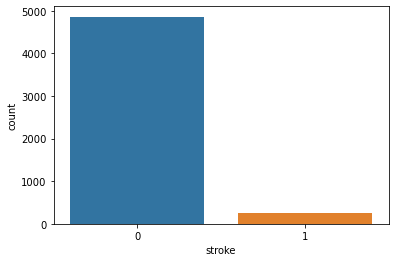

In [426]:
ax = sns.countplot(x=target,data=y)
print(y[target].value_counts())

In [380]:
Xt.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

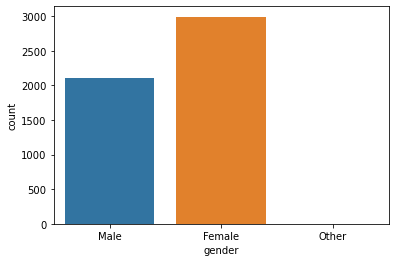

In [381]:
x=sns.countplot(x=Xt['gender'])

In [382]:
Xt.ever_married.value_counts()

Yes    3353
No     1757
Name: ever_married, dtype: int64

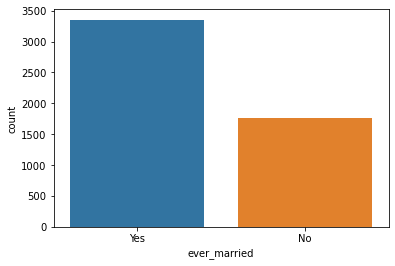

In [383]:
x=sns.countplot(x=Xt['ever_married'])

In [384]:
Xt.hypertension.value_counts()

0    4612
1     498
Name: hypertension, dtype: int64

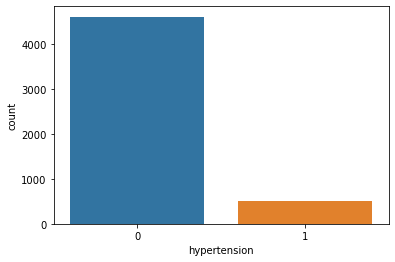

In [385]:
x=sns.countplot(x=Xt['hypertension'])

In [386]:
Xt.heart_disease.value_counts()

0    4834
1     276
Name: heart_disease, dtype: int64

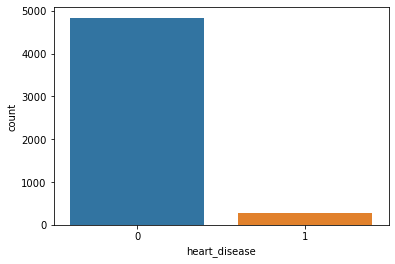

In [387]:
x=sns.countplot(x=Xt['heart_disease'])

In [388]:
Xt.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64

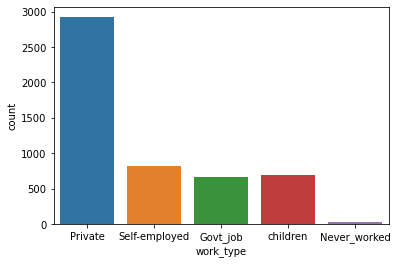

In [389]:
x=sns.countplot(x=Xt['work_type'])

In [390]:
Xt.Residence_type.value_counts()

Urban    2596
Rural    2514
Name: Residence_type, dtype: int64

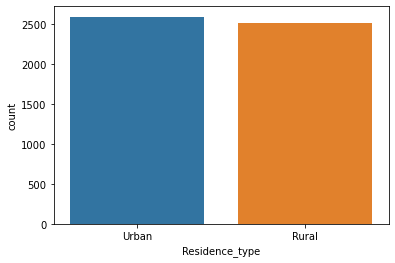

In [391]:
x=sns.countplot(x=Xt['Residence_type'])

In [392]:
Xt.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

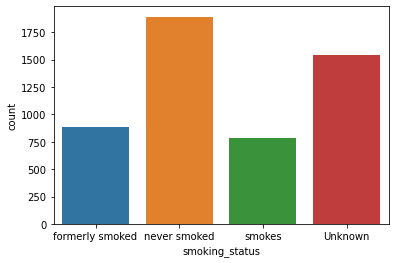

In [393]:
x=sns.countplot(x=Xt['smoking_status'])

In [394]:
categorical_features=['gender','ever_married','work_type','Residence_type','smoking_status']

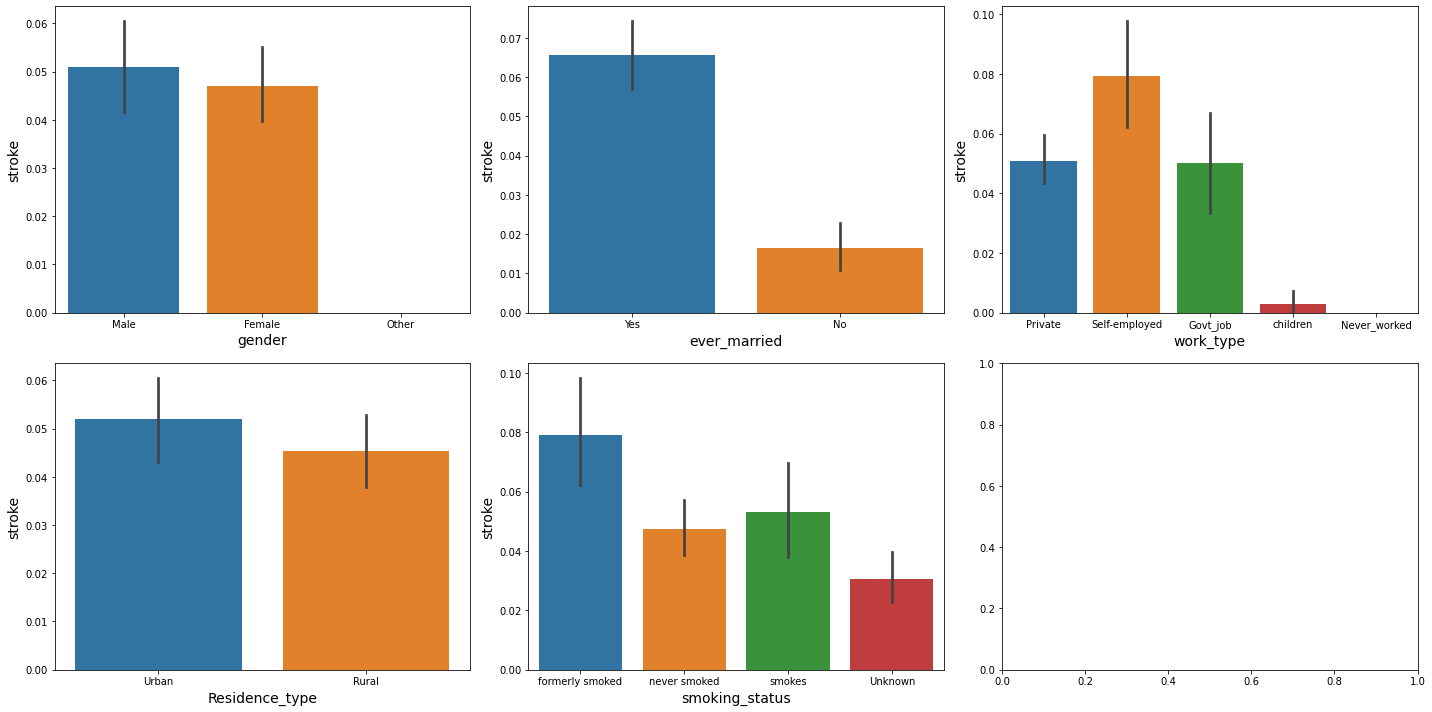

In [395]:
fig, axes = plt.subplots(2, 3, figsize=(20,10))
axes = [ax for axes_row in axes for ax in axes_row]
target = 'stroke'

for i, c in enumerate(categorical_features):
    sns.barplot(x=df[c], y=df[target], ax=axes[i])
    axes[i].set_ylabel('stroke', fontsize=14)
    axes[i].set_xlabel(c, fontsize=14)
    
plt.tight_layout()
plt.show()

In [396]:
from ydata_profiling import ProfileReport

In [397]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [398]:
profile = ProfileReport(Xt)
profile.to_file(output_file = "brain_stroke.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [399]:
Xt.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,1
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [400]:
Xt.tail()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
5105,Female,80.0,1,0,Yes,Private,Urban,83.75,28.7,never smoked,0
5106,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0
5108,Male,51.0,0,0,Yes,Private,Rural,166.29,25.6,formerly smoked,0
5109,Female,44.0,0,0,Yes,Govt_job,Urban,85.28,26.2,Unknown,0


In [401]:
gender = pd.get_dummies(Xt[['gender']])
gender.head()

,gender_Female,gender_Male,gender_Other
0,0,1,0
1,1,0,0
2,0,1,0
3,1,0,0
4,1,0,0


In [402]:
married = pd.get_dummies(Xt[['ever_married']])
married.head()

,ever_married_No,ever_married_Yes
0,0,1
1,0,1
2,0,1
3,0,1
4,0,1


In [403]:
work = pd.get_dummies(Xt[['work_type']])
work.head()

,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children
0,0,0,1,0,0
1,0,0,0,1,0
2,0,0,1,0,0
3,0,0,1,0,0
4,0,0,0,1,0


In [404]:
residence = pd.get_dummies(Xt[['Residence_type']])
residence.head()

,Residence_type_Rural,Residence_type_Urban
0,0,1
1,1,0
2,1,0
3,0,1
4,1,0


In [405]:
smoking = pd.get_dummies(Xt[['smoking_status']])
smoking.head()

,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,1,0,0
1,0,0,1,0
2,0,0,1,0
3,0,0,0,1
4,0,0,1,0


In [406]:
data = pd.concat([Xt, gender, married, work, residence, smoking], axis = 1)
data.head()

,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,...,0,1,0,0,0,1,0,1,0,0
1,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.7,never smoked,...,0,0,1,0,1,0,0,0,1,0
2,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,...,0,1,0,0,1,0,0,0,1,0
3,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,...,0,1,0,0,0,1,0,0,0,1
4,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,...,0,0,1,0,1,0,0,0,1,0


In [407]:
data = data.drop(columns=categorical_features, axis=1)
data.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,gender_Other,ever_married_No,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,0,1,0,0,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.7,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,0,1,0,0,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,1,0,0,0,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,1,0,0,0,...,0,0,1,0,1,0,0,0,1,0


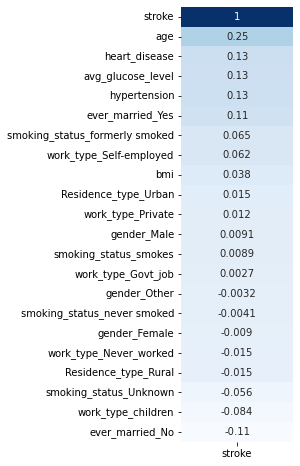

In [408]:
corr = data.corr()['stroke'].sort_values(ascending=False).to_frame()
plt.figure(figsize=(2,8))
sns.heatmap(corr, cmap='Blues', cbar=False, annot=True)
plt.show()

In [409]:
X= data.drop("stroke", axis=1)
X.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,gender_Other,ever_married_No,ever_married_Yes,...,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_Unknown,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,0,1,0,0,1,...,0,1,0,0,0,1,0,1,0,0
1,61.0,0,0,202.21,28.7,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,0,1,0,0,1,...,0,1,0,0,1,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,0,1,...,0,1,0,0,0,1,0,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,0,1,...,0,0,1,0,1,0,0,0,1,0


In [410]:
y= data[['stroke']]
y.head()

,stroke
0,1
1,1
2,1
3,1
4,1


In [412]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [413]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
x_train

array([[ 0.34379639, -0.32860186, -0.2389468 , ..., -0.45767615,
         1.30416474, -0.42731326],
       [ 0.47647849,  3.04319637, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354],
       [ 1.62639008, -0.32860186,  4.18503199, ..., -0.45767615,
        -0.7667743 , -0.42731326],
       ...,
       [-1.86049566, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 , -0.42731326],
       [ 1.62639008, -0.32860186, -0.2389468 , ...,  2.1849511 ,
        -0.7667743 , -0.42731326],
       [ 0.12265954, -0.32860186, -0.2389468 , ..., -0.45767615,
        -0.7667743 ,  2.34020354]])

In [414]:
import seaborn as sns
from sklearn.datasets import make_classification
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
x_train_sm, y_train_sm = oversample.fit_resample(x_train, y_train)

In [425]:
from sklearn import datasets, linear_model, metrics
reg = linear_model.LogisticRegression(max_iter=100000)
y_train = np.squeeze(y_train_sm.values.ravel())
reg.fit(x_train_sm, y_train_sm.values.ravel())
reg.score(x_test,y_test)

0.7504445761707172

In [423]:
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier()
y_train = np.squeeze(y_train_sm.values.ravel())
rf.fit(x_train_sm,y_train_sm.values.ravel())
rf.score(x_test,y_test)

0.9146413752222881

In [421]:
from sklearn.tree import DecisionTreeClassifier
dc = DecisionTreeClassifier()
y_train = np.squeeze(y_train_sm)
dc.fit(x_train_sm,y_train_sm)
dc.score(x_test,y_test)

0.8684054534676942

In [424]:
from sklearn.svm import SVC
model = SVC()
y_train = np.squeeze(y_train_sm.values.ravel())
model.fit(x_train_sm,y_train_sm.values.ravel())
model.score(x_test,y_test)

0.8417308832246592

In [442]:
prep = rf.predict(x_test)

In [443]:
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test, prep))
print(confusion_matrix(y_test,prep))

              precision    recall  f1-score   support

           0       0.95      0.96      0.96      1591
           1       0.16      0.11      0.13        96

    accuracy                           0.91      1687
   macro avg       0.55      0.54      0.54      1687
weighted avg       0.90      0.91      0.91      1687

[[1532   59]
 [  85   11]]


In [444]:
print(prep)

[0 0 0 ... 0 0 0]


In [445]:
import pickle
with open('model_pickle.pkl','wb') as file:
    pickle.dump(model,file)

In [345]:
# gender = input("Enter your gender:")
# age = int(input("Enter your age:"))
# hypertension=input("Enter Yes if u have hypertension or No if u dont have hypertension:")
# disease = input("Enter Yes if u have heart-disease or No if u dont have heart-disease:")
# married = input("Enter Yes if u are married or No if u are not married:")
# work = input("Enter different work_type: Self-employed,Governtment Job,Private,Never worked,children")
# residence = input("Enter residence type: Rural or Urban")
# glucose =float(input("Enter ur average glucose level:"))
# bmi = float(input("Enter ur BMI:"))
# smoking =input("Enter ur smoking status: Never-smoked,Fomerly-smoked,Smokes,Unknown")